In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/lish-moa/train_features.csv')
test_df = pd.read_csv('/content/drive/MyDrive/lish-moa/test_features.csv')
targetns = pd.read_csv('/content/drive/MyDrive/lish-moa/train_targets_nonscored.csv')
train_target_df = pd.read_csv('/content/drive/MyDrive/lish-moa/train_targets_scored.csv')
sub = pd.read_csv('/content/drive/MyDrive/lish-moa/sample_submission.csv')

In [5]:
print('Train data size: ', train_df.shape)
print('Test data size: ', test_df.shape)
print('target_scored data size: ', train_target_df.shape)
print('target_nonscored data size: ', targetns.shape)

Train data size:  (23814, 876)
Test data size:  (3982, 876)
target_scored data size:  (23814, 207)
target_nonscored data size:  (23814, 403)


In [9]:
genes = [col for col in train_df.columns if col.startswith('g-')]
cells = [col for col in train_df.columns if col.startswith('c-')]

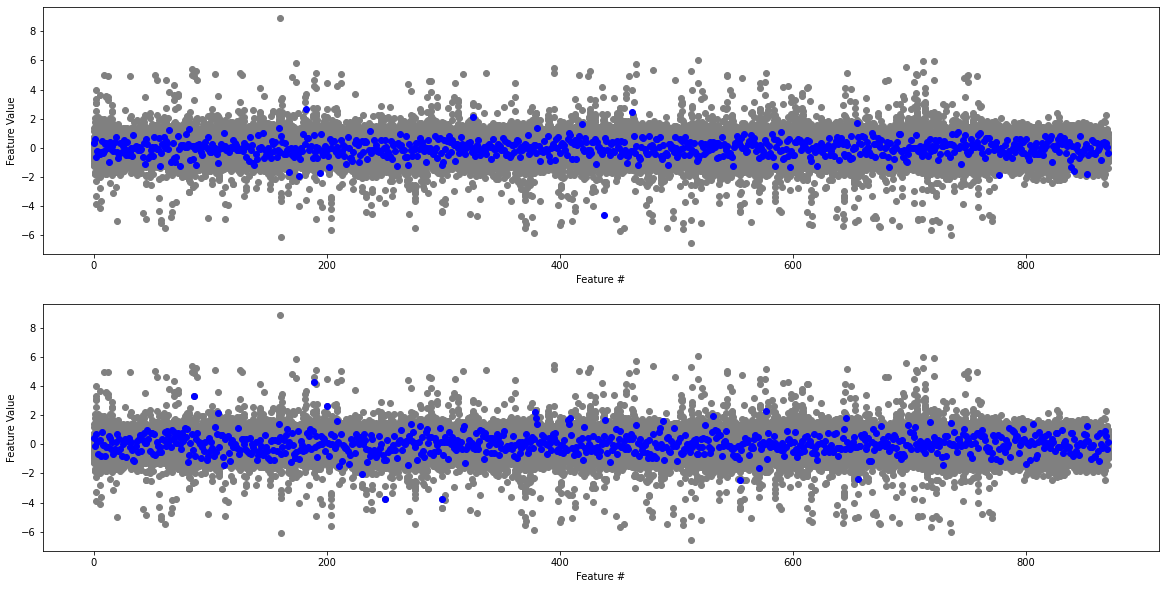

In [18]:
target = 'radiopaque_medium'
target_df = train_df[train_target_df[target] == 1].reset_index(drop = True)
target_features = target_df.values[:, 4:]
fig, ax = plt.subplots(2, 1, figsize = (20, 10))
# plot_one_vs_class(ax[0], 0, target_features)
# plot_one_vs_class(ax[1], 1, target_features)

for i, feat in enumerate(target_features):
  if i == 0: continue
  ax[0].scatter(np.arange(len(feat)), feat, c = 'grey')
  ax[0].set_xlabel('Feature #')
  ax[0].set_ylabel('Cell Viability')

ax[0].scatter(np.arange(len(target_features[0])), target_features[0], c = 'blue')

for i, feat in enumerate(target_features):
  if i == 1: continue
  ax[1].scatter(np.arange(len(feat)), feat, c = 'grey')
  ax[1].set_xlabel('Feature #')
  ax[1].set_ylabel('Cell viability')

ax[1].scatter(np.arange(len(target_features[1])), target_features[1], c = 'blue')

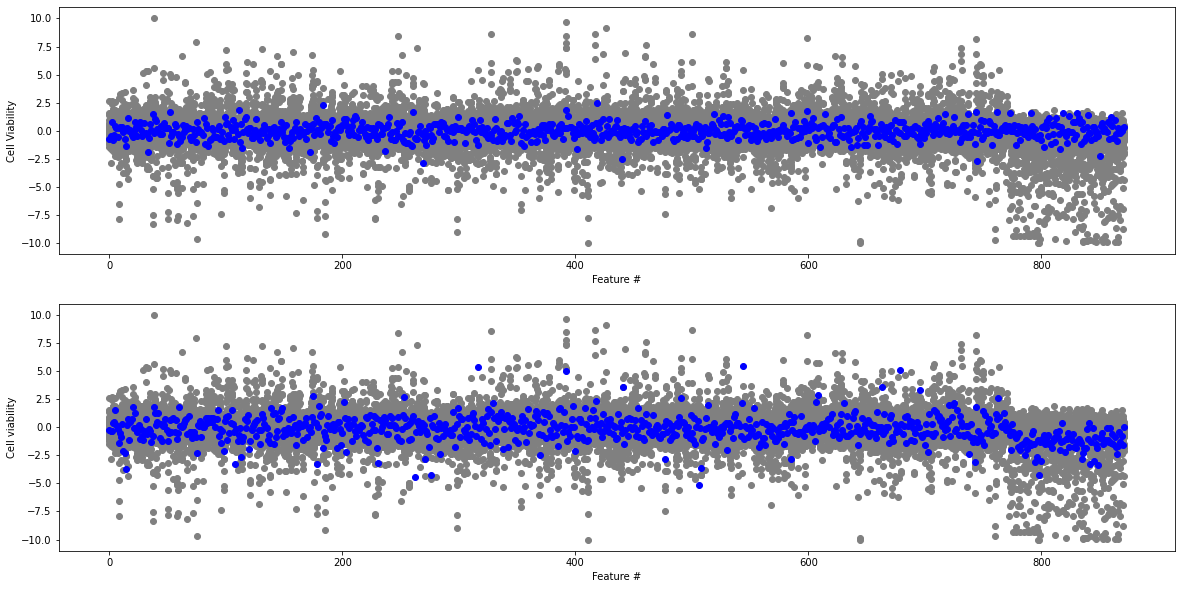

In [19]:
target = 'igf-1_inhibitor'
target_df = train_df[train_target_df[target] == 1].reset_index(drop = True)
target_features = target_df.values[:, 4:]
fig, ax = plt.subplots(2, 1, figsize = (20, 10))
# plot_one_vs_class(ax[0], 0, target_features)
# plot_one_vs_class(ax[1], 1, target_features)

for i, feat in enumerate(target_features):
  if i == 0: continue
  ax[0].scatter(np.arange(len(feat)), feat, c = 'grey')
  ax[0].set_xlabel('Feature #')
  ax[0].set_ylabel('Cell Viability')

ax[0].scatter(np.arange(len(target_features[0])), target_features[0], c = 'blue')

for i, feat in enumerate(target_features):
  if i == 1: continue
  ax[1].scatter(np.arange(len(feat)), feat, c = 'grey')
  ax[1].set_xlabel('Feature #')
  ax[1].set_ylabel('Cell viability')

ax[1].scatter(np.arange(len(target_features[1])), target_features[1], c = 'blue')

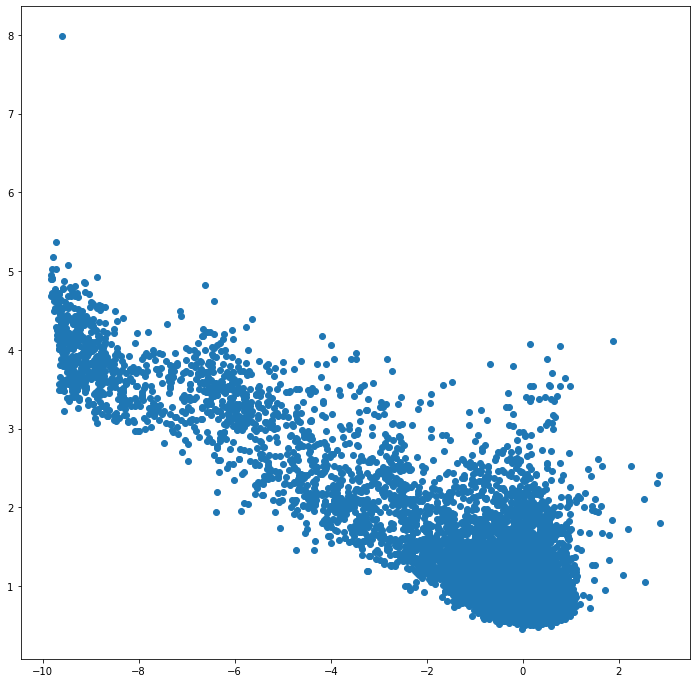

In [25]:
avg_cell_viab = np.mean(train_df.values[:, -100:], axis = 1)
std_dev_genes = np.std(train_df.values[:, 4:-100].astype(np.float), axis = 1)
fig2, ax = plt.subplots(1, 1, figsize = (12,12))
ax.scatter(avg_cell_viab, std_dev_genes)

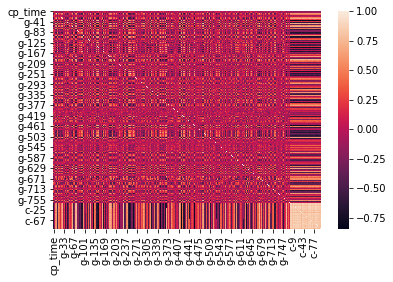

In [27]:
res = train_df.corr()
# print(res)
sns.heatmap(res)

In [ ]:
# data_train_scored = train_target_df.copy()
# data_train_scored.sum()[1:].sort_values()
# data_train_scored[-50:].plot(kind = 'barh', title = 'Max occurances', figsize = (12, 20))
# plt.show()
# train_target_df.sum()[1:].sort_values()
# train_target_df[:50].plot(kind = 'barh', title = 'Least occurances', figsize = (5, 20))
# plt.show()

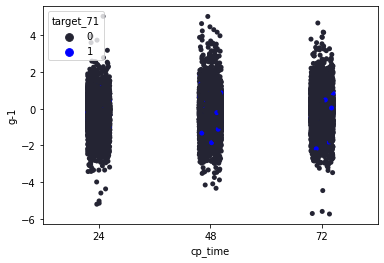

In [37]:
#relationship between feature and target
#target 71, feature g-1
train_copy = train_df.copy()
train_copy['target_71'] = train_target_df.iloc[:, 72]
sns.stripplot(data = train_copy, x = 'cp_time', y = 'g-1', color = 'blue', hue = 'target_71')

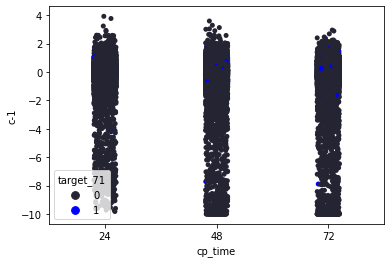

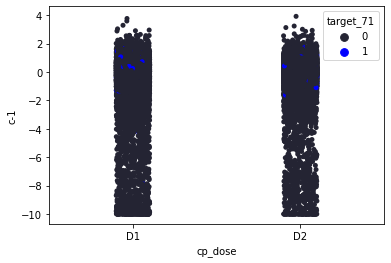

In [42]:
#target 71, feature c-1
plt.figure(1)
sns.stripplot(data = train_copy, x = 'cp_time', y = 'c-1', color = 'blue', hue = 'target_71')
plt.show()
plt.figure(2)
sns.stripplot(data = train_copy, x = 'cp_dose', y = 'c-1', color = 'blue', hue = 'target_71')
plt.show()